In [1]:
# Keras, dataset, and VGG19 imports
import keras
from keras.datasets import cifar10
from keras.applications import VGG19

In [2]:
# Loading VGG19 with imagenet weights
from keras.layers import Input

vgg19_model = VGG19(include_top = True, weights='imagenet')
vgg19_model.summary()

574710816/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# define new empty model
model = Sequential()

# add all layers except output from VGG19 to new model
for layer in vgg19_model.layers[:-1]:
  model.add(layer)

# freeze all weights
for layer in model.layers:
  layer.trainable = False

# add dropout layer and new output layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [4]:
# load dataset
(x_train, y_train) , (x_val, y_val) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [5]:
import numpy as np
import cv2

In [6]:
import matplotlib.pyplot as plt

NUM_CLASSES = 10

# Onehot encode labels

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)
print(y_train.shape)

(50000, 10)


In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [8]:
# returns batch_size random samples from either training set or validation set
# resizes each image to (224, 244, 3), the native input size for VGG19
def getBatch(batch_size, train_or_val='train'):
  x_batch = []
  y_batch = []
  if train_or_val == 'train':
    idx = np.random.randint(0, len(x_train), (batch_size))

    for i in idx:
      img = cv2.resize(x_train[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_train[i])
  elif train_or_val == 'val':
    idx = np.random.randint(0, len(x_val), (batch_size))

    for i in idx:
      img = cv2.resize(x_val[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_val[i])
  else:
    print("error, please specify train or val")

  x_batch = np.array(x_batch)
  y_batch = np.array(y_batch)
  return x_batch, y_batch


In [9]:
EPOCHS = 10
BATCH_SIZE = 128
VAL_SIZE = 500
STEPS = 50


for e in range(EPOCHS):
  train_loss = 0
  train_acc = 0

  for s in range(STEPS):
    x_batch, y_batch = getBatch(BATCH_SIZE, "train")
    #print(x_batch.shape)
    #print(y_batch.shape)
    out = model.train_on_batch(x_batch, y_batch)
    train_loss += out[0]
    train_acc += out[1]

  print(f"Epoch: {e}\nTraining Loss = {train_loss / STEPS}\tTraining Acc = {train_acc / STEPS}")

  x_v, y_v = getBatch(VAL_SIZE, "val")
  eval = model.evaluate(x_v, y_v)
  print(f"Validation loss: {eval[0]}\tValidation Acc: {eval[1]}\n")




Epoch: 0
Training Loss = 1.6527340912818909	Training Acc = 0.536875
16/16 [==============================] - 14s 487ms/step - loss: 0.9044 - categorical_accuracy: 0.7120
Validation loss: 0.9043696522712708	Validation Acc: 0.7120000123977661

Epoch: 1
Training Loss = 1.0790748929977416	Training Acc = 0.6765625
16/16 [==============================] - 2s 150ms/step - loss: 0.5971 - categorical_accuracy: 0.8060
Validation loss: 0.597080647945404	Validation Acc: 0.8059999942779541

Epoch: 2
Training Loss = 0.9696070790290833	Training Acc = 0.69609375
16/16 [==============================] - 2s 152ms/step - loss: 0.8075 - categorical_accuracy: 0.7400
Validation loss: 0.8075278401374817	Validation Acc: 0.7400000095367432

Epoch: 3
Training Loss = 0.9003183841705322	Training Acc = 0.72234375
16/16 [==============================] - 2s 151ms/step - loss: 0.7203 - categorical_accuracy: 0.7560
Validation loss: 0.7202984690666199	Validation Acc: 0.7559999823570251

Epoch: 4
Training Loss = 0.8684

In [10]:
x_v, y_v = getBatch(VAL_SIZE, "val")
eval1 = model.evaluate(x_v, y_v)
print(f"Validation loss: {eval1[0]}\tValidation Acc: {eval1[1]}\n")

16/16 [==============================] - 2s 145ms/step - loss: 0.6259 - categorical_accuracy: 0.8040
Validation loss: 0.6258930563926697	Validation Acc: 0.8040000200271606



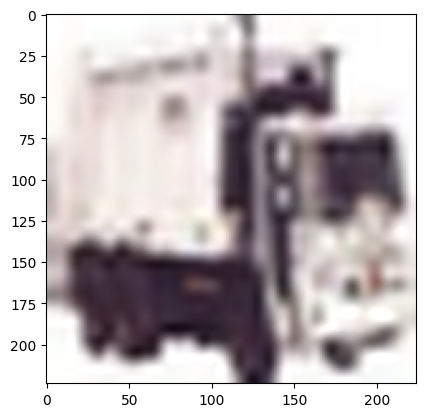

1/1 [==============================] - 1s 1s/step
pred: truck
acct: truck


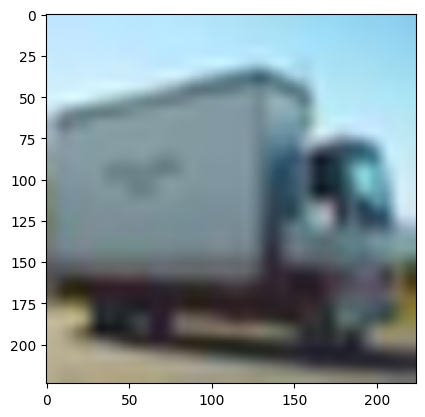

1/1 [==============================] - 0s 19ms/step
pred: truck
acct: truck


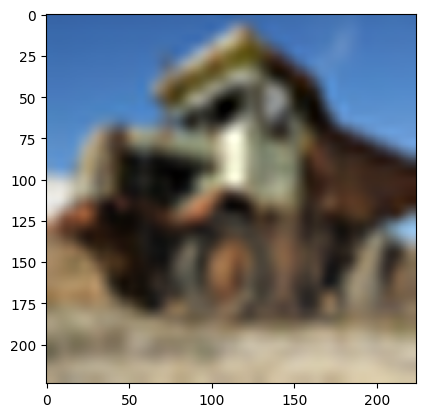

1/1 [==============================] - 0s 18ms/step
pred: truck
acct: truck


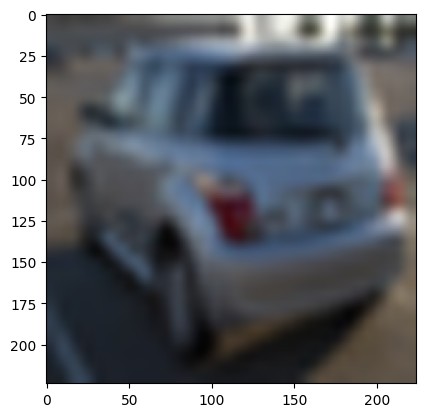

1/1 [==============================] - 0s 18ms/step
pred: automobile
acct: automobile


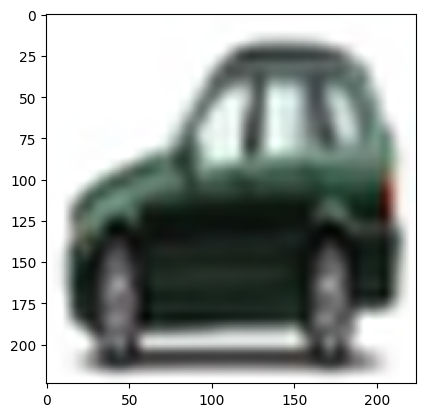

1/1 [==============================] - 0s 18ms/step
pred: automobile
acct: automobile


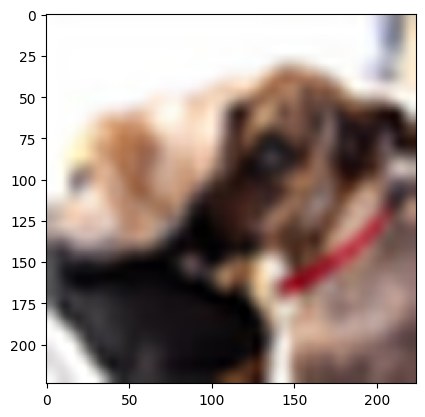

1/1 [==============================] - 0s 23ms/step
pred: dog
acct: dog


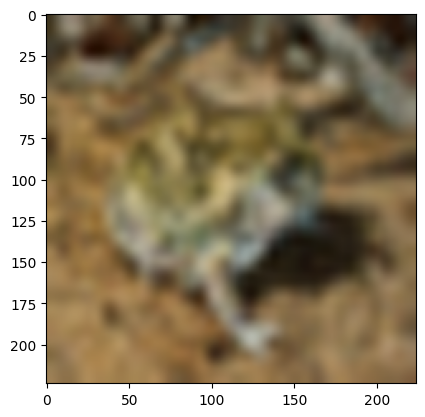

1/1 [==============================] - 0s 20ms/step
pred: frog
acct: frog


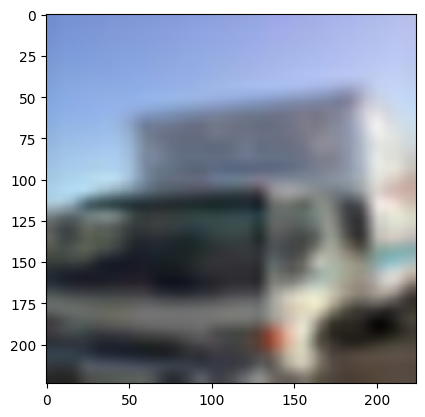

1/1 [==============================] - 0s 20ms/step
pred: ship
acct: truck


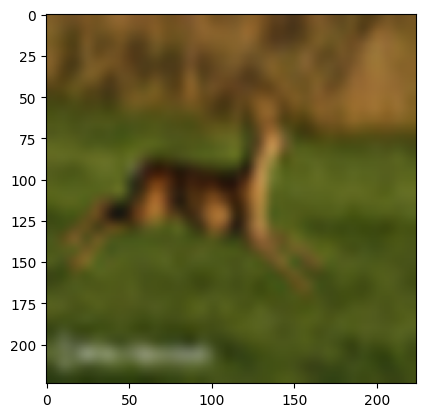

1/1 [==============================] - 0s 17ms/step
pred: deer
acct: deer


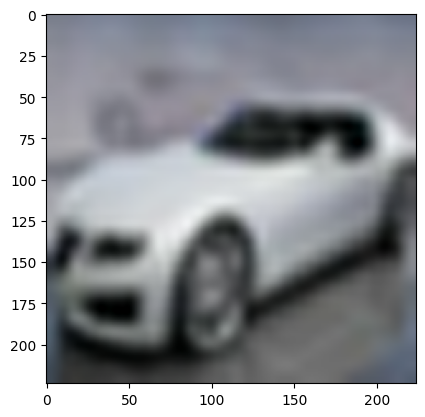

1/1 [==============================] - 0s 19ms/step
pred: automobile
acct: automobile


In [11]:
# Sample outputs from validation set
CATEGORIES = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

for i in range(10):

  import numpy as np
  plt.imshow(x_v[i])
  plt.show()
  print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
  print("acct: " + CATEGORIES[np.argmax(y_v[i])])



